In [1]:
#Import the relevand section of the NLP library
import nltk
nltk.download('punkt')
from nltk import word_tokenize
from nltk import sent_tokenize

import re

from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to /Users/Alex/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
seinfeld_directory = 'Seinfeld_Episodes/'

seinfeld_season_1_episodes = ['Season_1/S01_E01_The_Seinfeld_Chronicles.txt', 'Season_1/S01_E02_The_Robbery.txt',
                             'Season_1/S01_E03_Male_Unbonding.txt', 'Season_1/S01_E04_The_Stock_Tip.txt']

seinfeld_season_5_episodes = ['Season_5/S05_E01_The_Mango.txt', 'Season_5/S05_E02_The_Puffy_Shirt.txt',
                              'Season_5/S05_E03_The_Glasses.txt', 'Season_5/S05_E04_The_Sniffing_Accountant.txt',
                              'Season_5/S05_E05_The_Bris.txt', 'Season_5/S05_E06_The_Lip_Reader.txt',
                              'Season_5/S05_E07_The_Non_Fat_Yogurt.txt', 'Season_5/S05_E08_The_Barber.txt',
                              'Season_5/S05_E09_The_Masseuse.txt', 'Season_5/S05_E10_The_Cigar_Store_Indian.txt',
                              'Season_5/S05_E11_The_Conversion.txt', 'Season_5/S05_E12_The_Stall.txt',
                              'Season_5/S05_E13_The_Dinner_Party.txt', 'Season_5/S05_E14_The_Marine_Biologist.txt',
                              'Season_5/S05_E15_The_Pie.txt', 'Season_5/S05_E16_The_Stand-In.txt',
                              'Season_5/S05_E17_The_Wife.txt', 'Season_5/S05_E18_The_Raincoats_Part_1.txt',
                              'Season_5/S05_E19_The_Raincoats_Part_2.txt', 'Season_5/S05_E20_The_Fire.txt',
                              'Season_5/S05_E21_The_Hamptons.txt', 'Season_5/S05_E22_The Opposite.txt']

curb_directory = 'Curb_Episodes/'

curb_season_3_episodes = ["Season_3/S03_E01_Chet's_Shirt.txt", 'Season_3/S03_E02_The_Benadryl_Brownie.txt',
                              'Season_3/S03_E03_Club_Soda_and_Salt .txt', 'Season_3/S03_E04_The_Nanny_from_Hell.txt',
                              'Season_3/S03_E05_The_Terrorist_Attack.txt', 'Season_3/S03_E06_The_Special_Section.txt',
                              'Season_3/S03_E07_The_Corpse-Sniffing_Dog.txt', 'Season_3/S03_E08_Krazee-Eyez_Killa.txt',
                              'Season_3/S03_E09_Mary,_Joseph_and_Larry.txt', 'Season_3/S03_E10_The_Grand_Opening.txt']

curb_season_4_episodes = ["Season_4/S04_E01_Mel's_Offer.txt", "Season_4/S04_E02_Ben's_Birthday_Party.txt",
                         'Season_4/S04_E03_The_Blind_Date.txt', 'Season_4/S04_E04_The_Weatherman.txt',
                         'Season_4/S04_E05_The_5_Wood.txt', 'Season_4/S04_E06_The_Car_Pool_Lane.txt',
                         'Season_4/S04_E07_The_Surrogate.txt', 'Season_4/S04_E08_Wandering_Bear.txt',
                         'Season_4/S04_E09_The_Survivor.txt', 'Season_4/S04_E10_Opening_Night.txt']

curb_season_7_episodes = ["Season_7/S07_E01_Funkhouser's_Crazy_Sister.txt", 'Season_7/S07_E02_Vehicular_Fellatio.txt',
                         'Season_7/S07_E03_The_Reunion.txt', 'Season_7/S07_E04_The_Hot_Towel.txt',
                         'Season_7/S07_E05_Denise_Handicapped.txt', 'Season_7/S07_E06_The_Bare_Midriff.txt',
                         'Season_7/S07_E07_The_Black_Swan.txt', 'Season_7/S07_E08_Officer_Krupke.txt',
                         'Season_7/S07_E09_The_Table_Read.txt', 'Season_7/S07_E10_Seinfeld.txt']



In [3]:
def convert_file_names_to_dictionary(directory_name, list_of_file_names):

    episode_info = []
    
    show_name = " ".join(directory_name.split('/')[0].split('_')[:-1])
    
    for i in list_of_file_names:
        
        season = int(" ".join(i.split('/')[0].split('_')[1:]))
        
        i_contents = i.split('/')[1].split('_')
        
        episode = int(i_contents[1][1:])
        
        episode_name = " ".join(i_contents[2:])[:-4]
        
        episode_info.append({'show_name': show_name, 'season': season, 'episode': episode, 'episode_name': episode_name, 'file_path': directory_name + i})
        
    return episode_info

In [4]:
convert_file_names_to_dictionary(seinfeld_directory, seinfeld_season_1_episodes)

[{'show_name': 'Seinfeld',
  'season': 1,
  'episode': 1,
  'episode_name': 'The Seinfeld Chronicles',
  'file_path': 'Seinfeld_Episodes/Season_1/S01_E01_The_Seinfeld_Chronicles.txt'},
 {'show_name': 'Seinfeld',
  'season': 1,
  'episode': 2,
  'episode_name': 'The Robbery',
  'file_path': 'Seinfeld_Episodes/Season_1/S01_E02_The_Robbery.txt'},
 {'show_name': 'Seinfeld',
  'season': 1,
  'episode': 3,
  'episode_name': 'Male Unbonding',
  'file_path': 'Seinfeld_Episodes/Season_1/S01_E03_Male_Unbonding.txt'},
 {'show_name': 'Seinfeld',
  'season': 1,
  'episode': 4,
  'episode_name': 'The Stock Tip',
  'file_path': 'Seinfeld_Episodes/Season_1/S01_E04_The_Stock_Tip.txt'}]

In [5]:
seinfeld_dict_season_1 = convert_file_names_to_dictionary(seinfeld_directory, seinfeld_season_1_episodes)

seinfeld_dict_season_5 = convert_file_names_to_dictionary(seinfeld_directory, seinfeld_season_5_episodes)

curb_dict_season_3 = convert_file_names_to_dictionary(curb_directory, curb_season_3_episodes)

curb_dict_season_4 = convert_file_names_to_dictionary(curb_directory, curb_season_4_episodes)

curb_dict_season_7 = convert_file_names_to_dictionary(curb_directory, curb_season_7_episodes)

shows_dict = seinfeld_dict_season_1 + seinfeld_dict_season_5 + curb_dict_season_3 + curb_dict_season_4 + curb_dict_season_7

In [6]:
df = pd.DataFrame(shows_dict)
df.head()

,episode,episode_name,file_path,season,show_name
0,1,The Seinfeld Chronicles,Seinfeld_Episodes/Season_1/S01_E01_The_Seinfel...,1,Seinfeld
1,2,The Robbery,Seinfeld_Episodes/Season_1/S01_E02_The_Robbery...,1,Seinfeld
2,3,Male Unbonding,Seinfeld_Episodes/Season_1/S01_E03_Male_Unbond...,1,Seinfeld
3,4,The Stock Tip,Seinfeld_Episodes/Season_1/S01_E04_The_Stock_T...,1,Seinfeld
4,1,The Mango,Seinfeld_Episodes/Season_5/S05_E01_The_Mango.txt,5,Seinfeld


In [7]:
def open_file(file_path):

    with open(file_path, 'r') as file:
        raw_text = file.read().replace('\n', ' ')
    
    return raw_text

In [ ]:
#A function that takes in the raw text of a string, removes special characters and stop words,
#and returns the script text as a list where each element represents a word
def cleaned_episode(raw_text):
    
    raw_text_no_notes = re.sub("[\(\[].*?[\)\]]", "", raw_text)

    for symbol in "*,#-.?!''\n":
        raw_text_no_notes = raw_text_no_notes.replace(symbol, '').lower()
  
    cleaned_text = raw_text_no_notes.split(" ")    
    
    for i in cleaned_text:
        
        if i.endswith(':') == True or i == '' or i == ' ':
            cleaned_text.remove(i)
            
        i = i.replace('.', '')
        i = i.replace('?', '')
        i = i.replace('!', '')

     
    return cleaned_text

In [8]:
def cleaned_episode(raw_text, stop_words = False):
    
    raw_text_no_notes = re.sub("[\(\[].*?[\)\]]", "", raw_text)

    for symbol in "*,#-.?!''\n":
        raw_text_no_notes = raw_text_no_notes.replace(symbol, '').lower()
  
    cleaned_text = raw_text_no_notes.split(" ")    
    
    for i in cleaned_text:
        
        if i.endswith(':') == True or i == '' or i == ' ':
            cleaned_text.remove(i)
            
        i = i.replace('.', '')
        i = i.replace('?', '')
        i = i.replace('!', '')
        
    cleaned_text  = [word for word in cleaned_text if word.endswith(':') == False]
    
    if stop_words:
        
        cleaned_text  = [word for word in cleaned_text if word.lower() not in stop_words]
     
    return cleaned_text

In [9]:
character_names = ['jerry', 'george', 'elaine', 'kramer', 'newman', 'steinbrenner', 'larry', 'cheryl', 'david', 'jeff', 'susie']

In [10]:
for i in df.file_path:
    episode_text = open_file(i)
    print(cleaned_episode(episode_text, character_names)[:20])

['so', 'im', 'on', 'line', 'at', 'the', 'supermarket', 'two', 'women', 'in', 'front', 'of', 'me', 'one', 'of', 'them', 'her', 'total', 'was', 'eight']
['so', 'i', 'move', 'into', 'the', 'centre', 'lane', 'now', 'i', 'get', 'ahead', 'of', 'this', 'women', 'who', 'felt', 'for', 'some', 'reason', 'i']
['most', 'men', 'like', 'working', 'on', 'things', 'tools', 'objects', 'fixing', 'things', 'this', 'is', 'what', 'men', 'enjoy', 'doing', 'have', 'you', 'ever', 'noticed']
['went', 'out', 'to', 'dinner', 'the', 'other', 'night', 'check', 'came', 'at', 'the', 'end', 'of', 'the', 'meal', 'as', 'it', 'always', 'does', 'never']
['a', 'female', 'orgasm', 'is', 'kinda', 'like', 'the', 'bat', 'cave', 'a', 'very', 'few', 'people', 'know', 'where', 'it', 'is', 'and', 'if', 'youre']
['i', 'cant', 'believe', 'this', 'oh', 'it', 'wont', 'be', 'for', 'that', 'long', 'how', 'can', 'i', 'do', 'this', 'how', 'can', 'i', 'move']
['i', 'never', 'get', 'enough', 'sleep', 'i', 'stay', 'up', 'late', 'at', 'night

# Part Two: tokenize/stemming/lemmatization

## Tokenize

In [11]:
episode_1_text = open_file(df.loc[0].file_path)
episode_1_text[:500]

"Jerry: So, I'm on line at the supermarket. Two women in front of me. One of  them, her total was eight dollars, the other three dollars. They both  of course choose to pay by the use of the (pause and gesture to audience  for response)  Audience: Cheque  Jerry: Cheque. Now, the fact is, if it's a woman in front of you that's  writing the cheque, you will not be waiting long. I have noticed that  women are very *fast* with cheques, y'know, 'cuz they write out so many  cheques. The keys, they can "

In [12]:
cleaned_episode_1_text = cleaned_episode(episode_1_text, character_names)
" ".join(cleaned_episode_1_text[:500])

'so im on line at the supermarket two women in front of me one of them her total was eight dollars the other three dollars they both of course choose to pay by the use of the cheque cheque now the fact is if its a woman in front of you thats writing the cheque you will not be waiting long i have noticed that women are very fast with cheques yknow cuz they write out so many cheques the keys they can never find in their purse they dont know where that is but the cheque book they got that they never fumble for the cheque book the cheque book comes out of a ``who do i make it out to theres my id theres something about a cheque that to a man is not masculine i dont know exactly what it is i think to a man a cheque is like a note from your mother that says ``i dont have any money but if youll contact these people im sure theyll stick up for me if you just trust me this one time i dont have any money but i have these i wrote on these; is this of any value at all whats that one "coccoon the re

In [13]:
def tokenize(clean_text):
    joined_episode = ' '.join(clean_text)
    tokenized_episode = word_tokenize(joined_episode)
    
    return tokenized_episode

In [14]:
tokenize_episode_1_text = tokenize(cleaned_episode_1_text)
" ".join(tokenize_episode_1_text[:500])

"so im on line at the supermarket two women in front of me one of them her total was eight dollars the other three dollars they both of course choose to pay by the use of the cheque cheque now the fact is if its a woman in front of you thats writing the cheque you will not be waiting long i have noticed that women are very fast with cheques yknow cuz they write out so many cheques the keys they can never find in their purse they dont know where that is but the cheque book they got that they never fumble for the cheque book the cheque book comes out of a `` who do i make it out to theres my id theres something about a cheque that to a man is not masculine i dont know exactly what it is i think to a man a cheque is like a note from your mother that says `` i dont have any money but if youll contact these people im sure theyll stick up for me if you just trust me this one time i dont have any money but i have these i wrote on these ; is this of any value at all whats that one `` coccoon t

## Lemmetization

In [15]:
#https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

import nltk
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

In [16]:
def lemmatize_text(tokenized_text):
    return ' '.join([lemmatizer.lemmatize(w) for w in tokenized_text])

# One Function To Process Text

In [17]:
def process_text(file_name):
    raw_episode_text = open_file(file_name)
    clean_episode_text = cleaned_episode(raw_episode_text)
    tokenize_episode_text = tokenize(clean_episode_text)
    lemmatize_episode_text = lemmatize_text(tokenize_episode_text)
    
    return lemmatize_episode_text

In [18]:
df['lemmatize_text'] = df.file_path.apply(lambda x: process_text(x))

In [19]:
df.head()

,episode,episode_name,file_path,season,show_name,lemmatize_text
0,1,The Seinfeld Chronicles,Seinfeld_Episodes/Season_1/S01_E01_The_Seinfel...,1,Seinfeld,so im on line at the supermarket two woman in ...
1,2,The Robbery,Seinfeld_Episodes/Season_1/S01_E02_The_Robbery...,1,Seinfeld,so i move into the centre lane now i get ahead...
2,3,Male Unbonding,Seinfeld_Episodes/Season_1/S01_E03_Male_Unbond...,1,Seinfeld,most men like working on thing tool object fix...
3,4,The Stock Tip,Seinfeld_Episodes/Season_1/S01_E04_The_Stock_T...,1,Seinfeld,went out to dinner the other night check came ...
4,1,The Mango,Seinfeld_Episodes/Season_5/S05_E01_The_Mango.txt,5,Seinfeld,a female orgasm is kinda like the bat cave a v...


In [20]:
df.tail()

,episode,episode_name,file_path,season,show_name,lemmatize_text
51,6,The Bare Midriff,Curb_Episodes/Season_7/S07_E06_The_Bare_Midrif...,7,Curb,jeez what are you doing in there what in the w...
52,7,The Black Swan,Curb_Episodes/Season_7/S07_E07_The_Black_Swan.txt,7,Curb,god only know what that man ha let go through ...
53,8,Officer Krupke,Curb_Episodes/Season_7/S07_E08_Officer_Krupke.txt,7,Curb,if sammi doesnt want to take clarinet anymore ...
54,9,The Table Read,Curb_Episodes/Season_7/S07_E09_The_Table_Read.txt,7,Curb,uhhuh unbelievable right is this insane larry ...
55,10,Seinfeld,Curb_Episodes/Season_7/S07_E10_Seinfeld.txt,7,Curb,ive been dreading telling you about this whole...


# Part Three: Vectorizing the Text & Creating The Classifier

In [21]:
#Unique target values
df.show_name.unique()

array(['Seinfeld', 'Curb'], dtype=object)

In [22]:
#Encode the Target Variable show_name
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(df.show_name)

LabelEncoder()

In [23]:
le.classes_

array(['Curb', 'Seinfeld'], dtype=object)

In [24]:
df.show_name = le.transform(df.show_name)

In [25]:
#Run to undo the label encoder
#df.show_name = le.inverse_transform(df.show_name)

In [26]:
df.head()

,episode,episode_name,file_path,season,show_name,lemmatize_text
0,1,The Seinfeld Chronicles,Seinfeld_Episodes/Season_1/S01_E01_The_Seinfel...,1,1,so im on line at the supermarket two woman in ...
1,2,The Robbery,Seinfeld_Episodes/Season_1/S01_E02_The_Robbery...,1,1,so i move into the centre lane now i get ahead...
2,3,Male Unbonding,Seinfeld_Episodes/Season_1/S01_E03_Male_Unbond...,1,1,most men like working on thing tool object fix...
3,4,The Stock Tip,Seinfeld_Episodes/Season_1/S01_E04_The_Stock_T...,1,1,went out to dinner the other night check came ...
4,1,The Mango,Seinfeld_Episodes/Season_5/S05_E01_The_Mango.txt,5,1,a female orgasm is kinda like the bat cave a v...


In [27]:
#Train Test Split The Data Frame
X_train, X_test, y_train, y_test = train_test_split(df.lemmatize_text, df.show_name, test_size=0.2, random_state=42)

In [28]:
text_clf = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', MultinomialNB())
                    ])

In [29]:
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
 ...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [30]:
test_predictions = text_clf.predict(X_test)

In [31]:
print(metrics.classification_report(y_test, test_predictions, 
                              target_names = le.classes_))

              precision    recall  f1-score   support

        Curb       0.50      1.00      0.67         6
    Seinfeld       0.00      0.00      0.00         6

   micro avg       0.50      0.50      0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Visualization

### PCA

In [32]:
df_visualization = df.copy()

In [33]:
df_visualization.head()

,episode,episode_name,file_path,season,show_name,lemmatize_text
0,1,The Seinfeld Chronicles,Seinfeld_Episodes/Season_1/S01_E01_The_Seinfel...,1,1,so im on line at the supermarket two woman in ...
1,2,The Robbery,Seinfeld_Episodes/Season_1/S01_E02_The_Robbery...,1,1,so i move into the centre lane now i get ahead...
2,3,Male Unbonding,Seinfeld_Episodes/Season_1/S01_E03_Male_Unbond...,1,1,most men like working on thing tool object fix...
3,4,The Stock Tip,Seinfeld_Episodes/Season_1/S01_E04_The_Stock_T...,1,1,went out to dinner the other night check came ...
4,1,The Mango,Seinfeld_Episodes/Season_5/S05_E01_The_Mango.txt,5,1,a female orgasm is kinda like the bat cave a v...


In [34]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(df_visualization.lemmatize_text).todense()

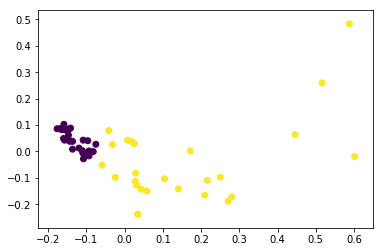

In [35]:
# from https://stackoverflow.com/questions/28160335/plot-a-document-tfidf-2d-graph
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1], c=df_visualization.show_name)

In [36]:
#There are 8856 dimensions (unique tokens) and 56 episodes
X.shape

(56, 8846)

In [37]:
# from https://stackoverflow.com/questions/28160335/plot-a-document-tfidf-2d-graph
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [38]:
transformed_data_3d = pca.fit_transform(X)

In [39]:
num_seinfeld = df_visualization['show_name'].value_counts()[0]

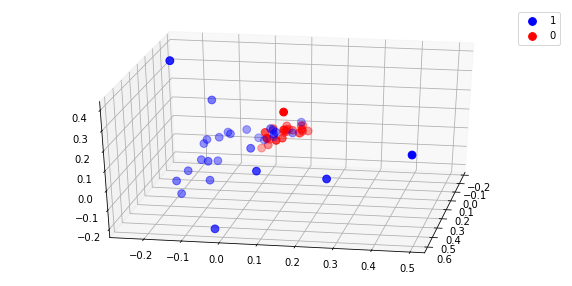

In [40]:
seinfeld_3d = transformed_data_3d[:num_seinfeld]
k3_x = [i[0] for i in seinfeld_3d]
k3_y = [i[1] for i in seinfeld_3d]
k3_z = [i[2] for i in seinfeld_3d]

curb_3d = transformed_data_3d[num_seinfeld:]
g3_x = [i[0] for i in curb_3d]
g3_y = [i[1] for i in curb_3d]
g3_z = [i[2] for i in curb_3d]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(k3_x, k3_y, k3_z, c='b', s=60, label=1)
ax.scatter(g3_x, g3_y, g3_z, c='red', s=60, label=0)
ax.view_init(30, 10)
ax.legend()
plt.show()

### T-SINE

In [41]:
tf_idf_vals_list = []

for i in X:
    tf_idf_vals_list.append(list(np.squeeze(np.asarray(i))))

In [42]:
t_sne_object_2d = TSNE(n_components=2)
transformed_data_2d = t_sne_object_2d.fit_transform(tf_idf_vals_list)

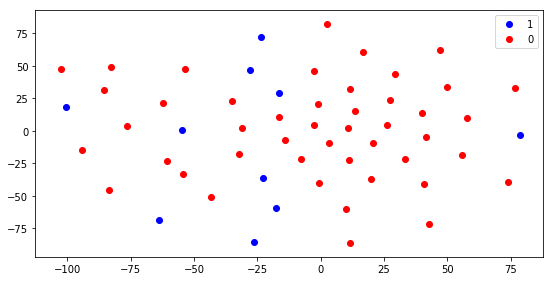

In [43]:
seinfeld_2d = transformed_data_2d[:10]
k2_x = [i[0] for i in seinfeld_2d]
k2_y = [i[1] for i in seinfeld_2d]

curb_2d = transformed_data_2d[10:]
g2_x = [i[0] for i in curb_2d]
g2_y = [i[1] for i in curb_2d]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(222)
ax.scatter(k2_x, k2_y, c='b', label=1)
ax.scatter(g2_x, g2_y, c='red', label=0)
ax.legend()
plt.show()

In [44]:
t_sne_object_3d = TSNE(n_components=3)
transformed_data_3d = t_sne_object_3d.fit_transform(tf_idf_vals_list)

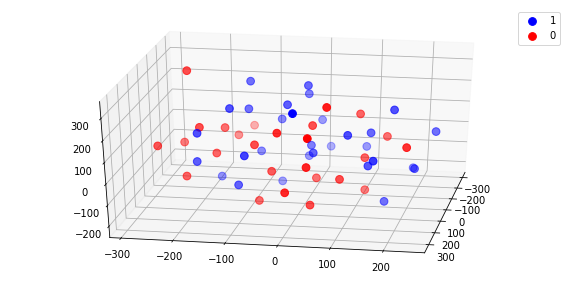

In [45]:
seinfeld_3d = transformed_data_3d[:num_seinfeld]
k3_x = [i[0] for i in seinfeld_3d]
k3_y = [i[1] for i in seinfeld_3d]
k3_z = [i[2] for i in seinfeld_3d]

curb_3d = transformed_data_3d[num_seinfeld:]
g3_x = [i[0] for i in curb_3d]
g3_y = [i[1] for i in curb_3d]
g3_z = [i[2] for i in curb_3d]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(k3_x, k3_y, k3_z, c='b', s=60, label=1)
ax.scatter(g3_x, g3_y, g3_z, c='red', s=60, label=0)
ax.view_init(30, 10)
ax.legend()
plt.show()